In [15]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt

import random
import glob
import os

# Plot Data Distribution

In [9]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [12]:
hot_dog_train_data = glob.glob('data/train/hot_dog/*.jpg')
not_hotdog_train_data = glob.glob('data/train/not_hot_dog/*.jpg')

hot_dog_test_data = glob.glob('data/test/hot_dog/*.jpg')
not_hotdog_test_data = glob.glob('data/test/not_hot_dog/*.jpg')

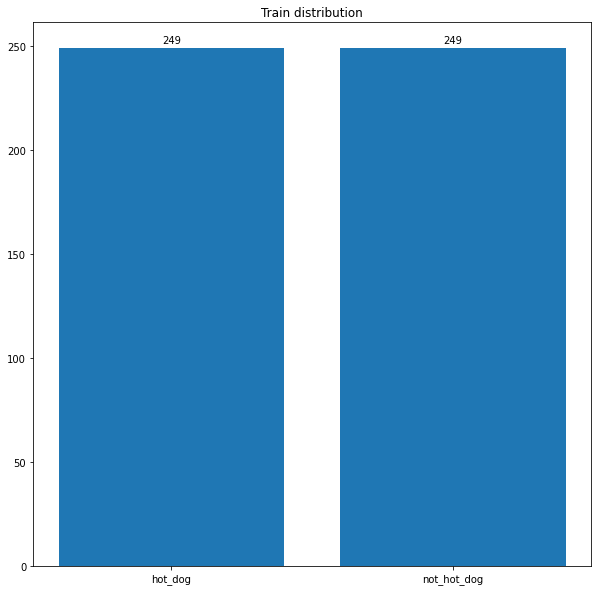

In [45]:
plt.figure(figsize=(10, 10))
plt.title('Train distribution')
rect = plt.bar(['hot_dog', 'not_hot_dog'],[len(hot_dog_train_data), len(not_hotdog_train_data)])
autolabel(rect)

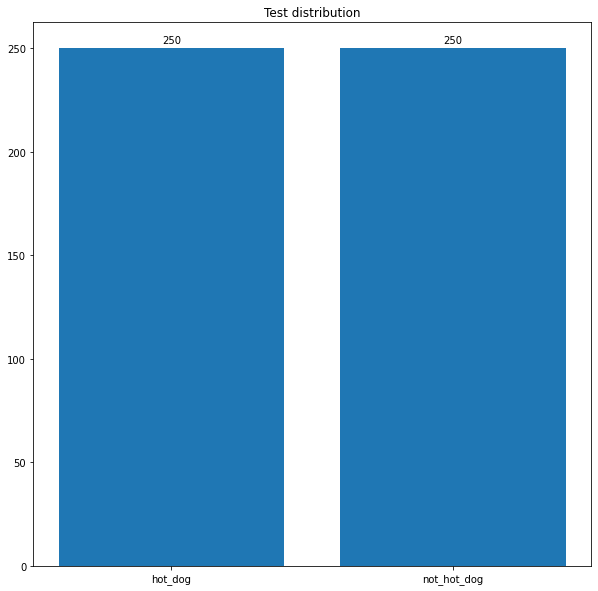

In [14]:
plt.figure(figsize=(10, 10))
plt.title('Test distribution')
rect = plt.bar(['hot_dog', 'not_hot_dog'],[len(hot_dog_test_data), len(not_hotdog_test_data)])
autolabel(rect)

# Visualize Image

In [56]:
import pandas as pd

/home/superceed1/anaconda3/envs/py36tf21/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [41]:
train_data = np.concatenate([hot_dog_train_data, not_hotdog_train_data])
test_data = np.concatenate([hot_dog_test_data, not_hotdog_test_data])

In [65]:
# Check size of all image
concat_data = []
for data in train_data:
    dimen = cv2.imread(data).shape[:2]
    concat_data.append({
        'image_name': os.path.basename(data),
        'dimen': dimen
    })

size_counts = pd.DataFrame(concat_data)['dimen'].value_counts()

keys = []
for key in size_counts.keys():
    keys.append(str(key))

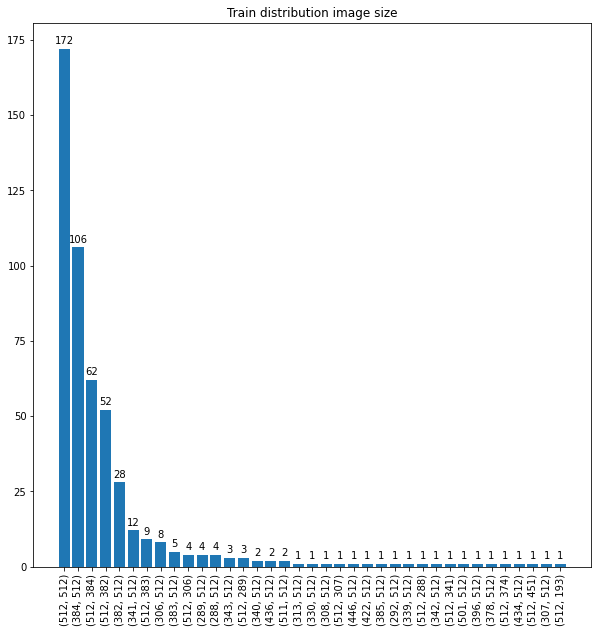

In [92]:
plt.figure(figsize=(10, 10))
plt.xticks(rotation=90)
plt.title('Train distribution image size')
rect = plt.bar(keys, size_counts.values)
autolabel(rect)

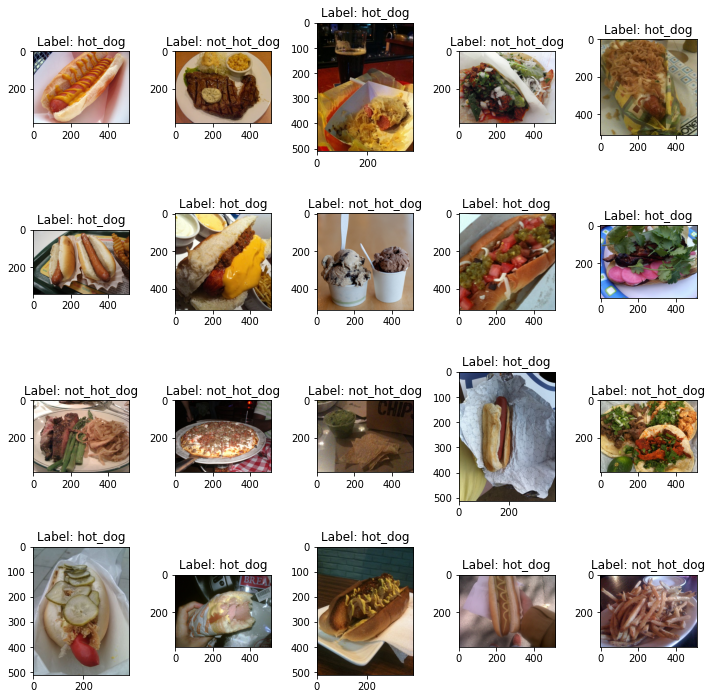

In [43]:
samples = np.random.choice(test_data, 20)

row, column = 4, 5
count = 0

plt.figure(figsize=(10, 10))
for sample in samples:
    img = cv2.imread(sample)
    
    count += 1
    plt.subplot(row, column, count)
    plt.title('Label: ' + os.path.basename(os.path.dirname(sample)))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
plt.tight_layout()